# Credit Card Customer Segmentation

## Introduction

Goal of the project is to segment the data into different groups to apply different business strategies for each type of customer.  For instance, it would be useful to give incentives to customers who have a high income, but little credit card utilization.  

Below are the features of the dataset:

* customer_id
* age - customer age
* gender - customer gender
* dependent_count - number of dependents of each customer
* education_level - level of customer education
* marital_status - marital status of customer
* estimated_income - estimated income of customer
* months_on_book - time as customer in months
* total_relationship_count - times customer contacted company
* months_inactive_12_mon - months customer did not use credit card in last 12 months
* credit_limit - customer's credit limit
* total_trans_amount - overall money spent on card by the customer
* total_trans_count - overall number of times customer used the card
* avg_utilization_ratio - daily average utilization ratio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set_style(style="whitegrid")

# Function used to add labels containing values to top of bars in seaborn barplots
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [2]:
customer=pd.read_csv('customer_segmentation.csv')
print(customer.info())
customer.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


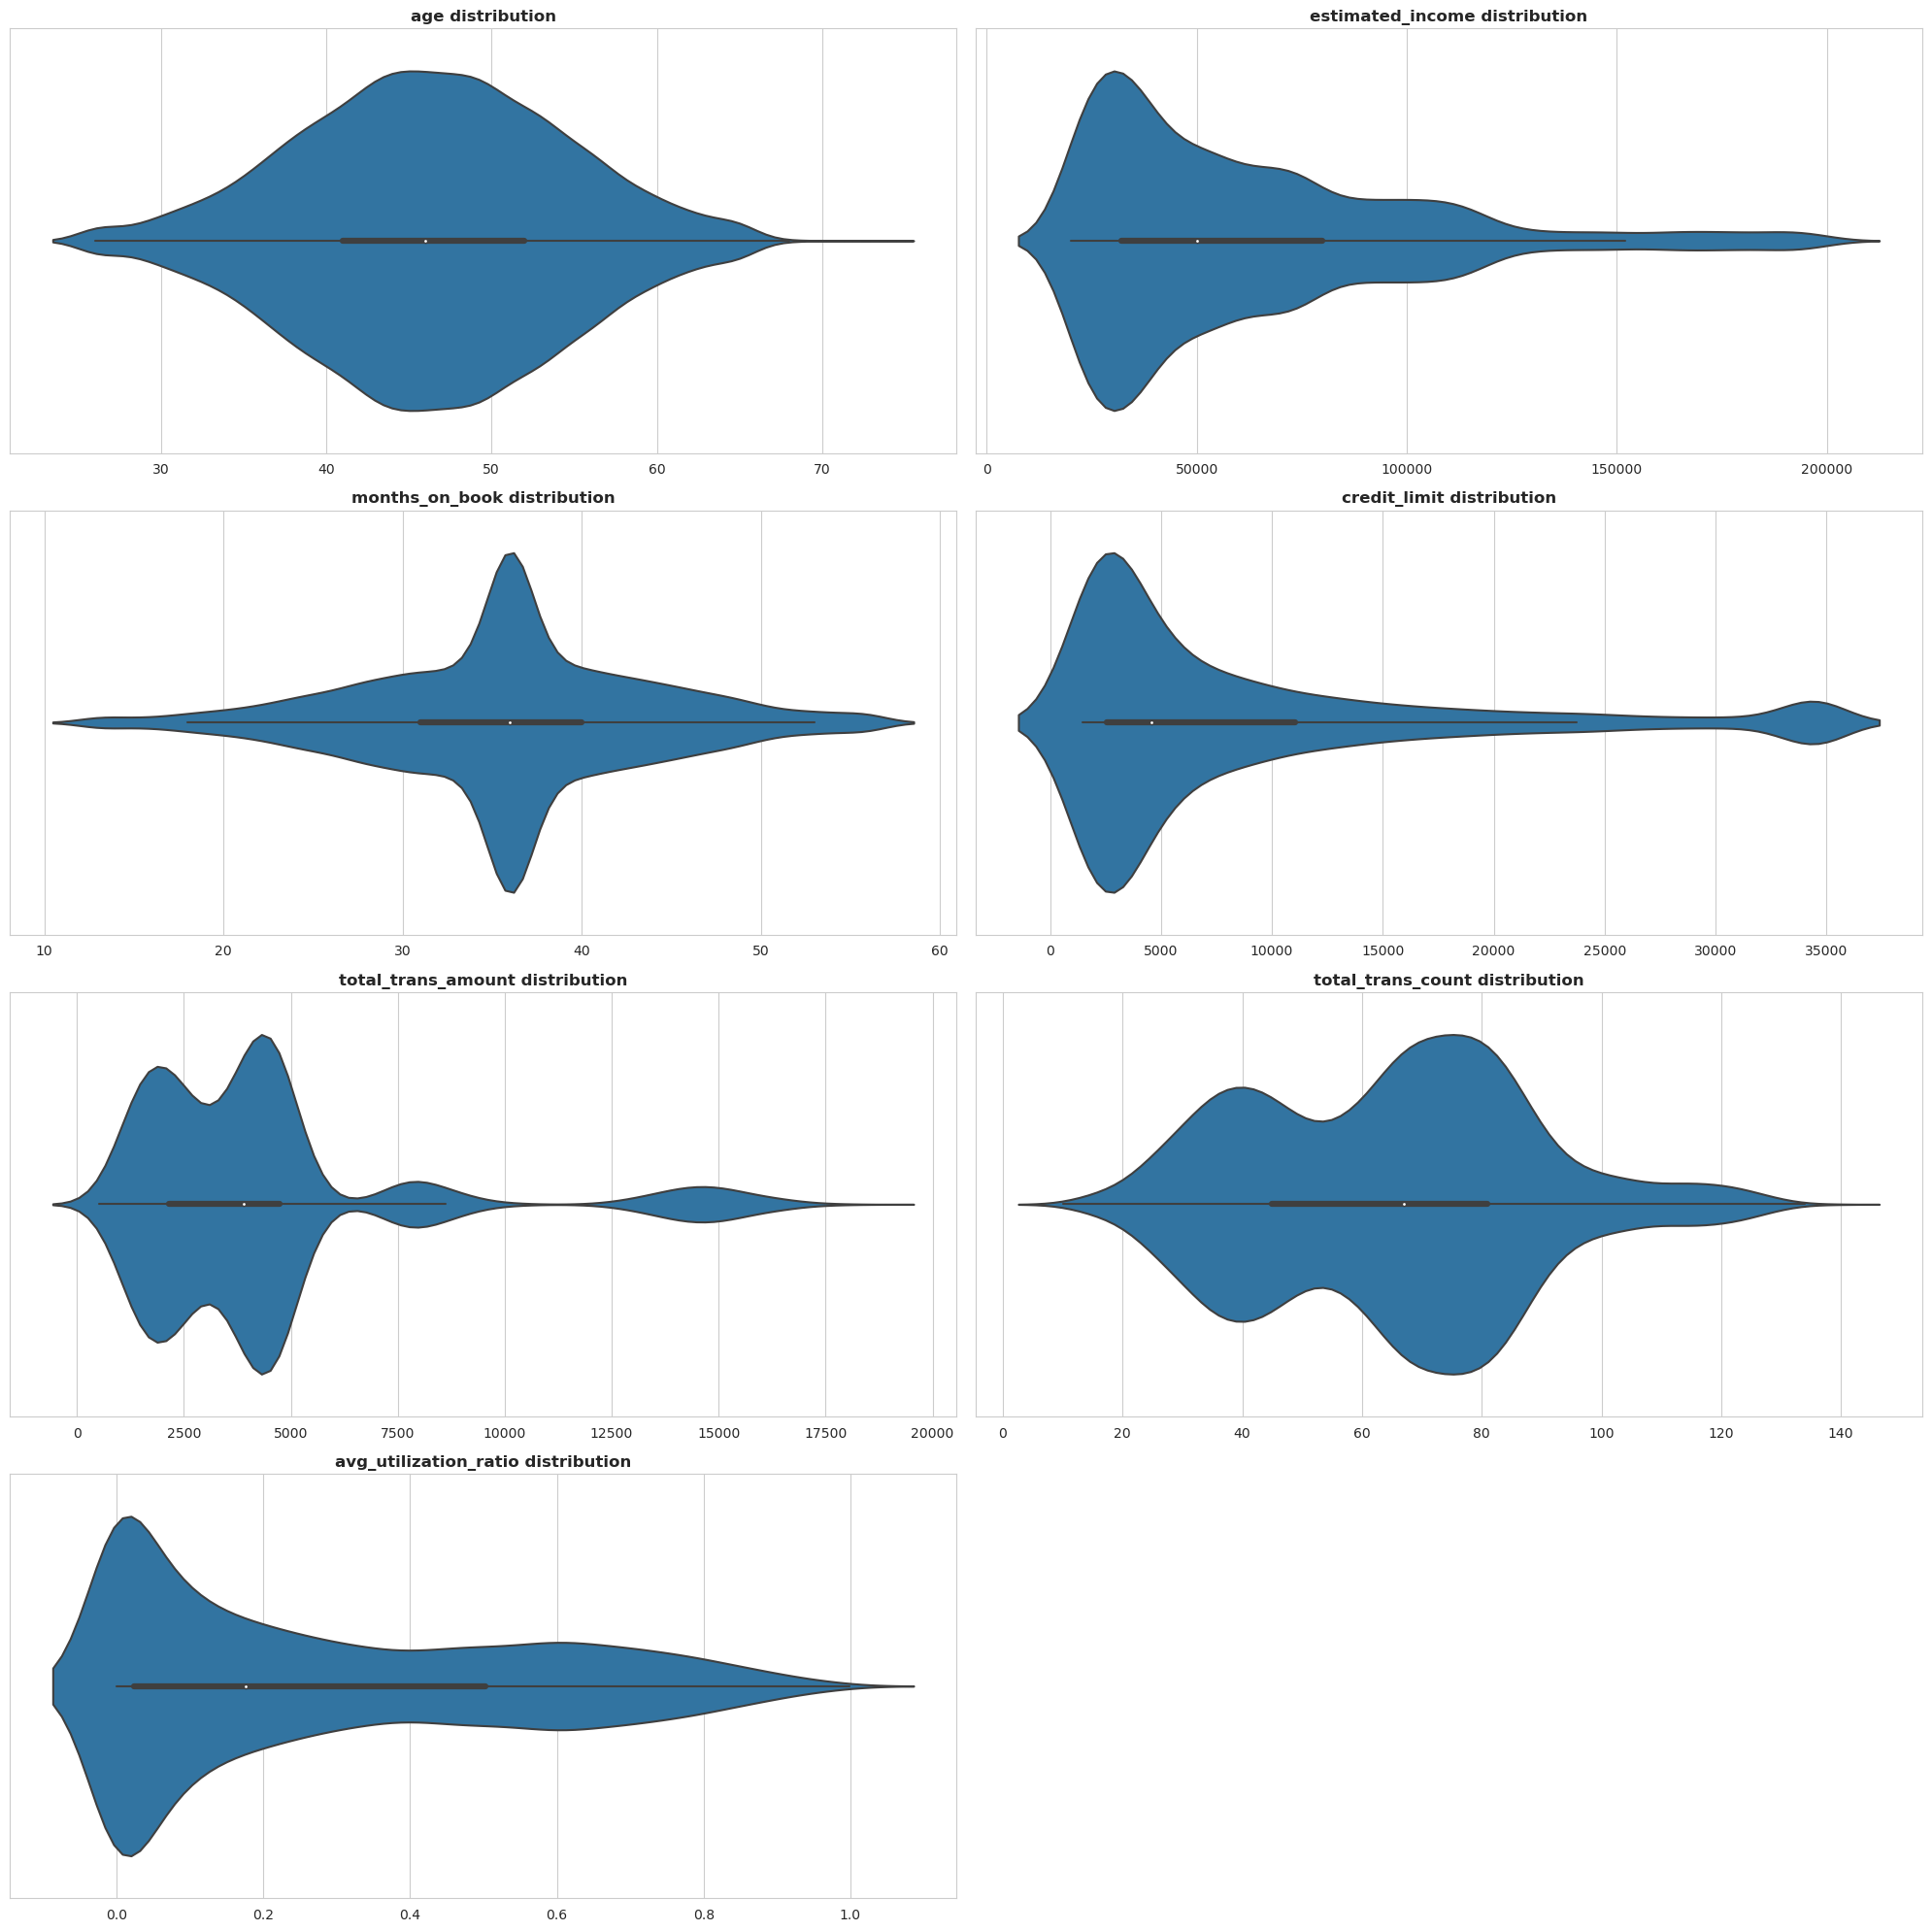

In [3]:
numeric_columns=['age', 'estimated_income', 'months_on_book', 'credit_limit'
                 ,'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']

plt.figure(figsize=(20,20))

for i, col in enumerate(numeric_columns):
    plt.subplot(4,2,i+1)
    sns.violinplot(data=customer, x=col)
    plt.title(f'{col} distribution', weight='bold')
    plt.xlabel('')
plt.tight_layout()   
plt.show()

Above are the distributions of continuous numerical variables in the dataset.  

* The age distribution is highest between about 35 to 55 years old.
* The income distribution has a median value of about \\$50,000 dollars with a max value at over \\$200,000 a year.
* Months_on_book distribution is symmetrical with a median value of about 36 months or 3 years.
* Credit Limit distribution median value is below \\$5,000 a year and slowly decreases as the values increase, but there is another increase near the upper end of the spectrum at \\$35,000 mark.
* Distribution of total_trans_amount is strongly right_skewed.
* Distribution of total_trans_count is weekly right skewed with a median just below 70.
* Avg_utilization_ratio distribution is strongly right_skewed with most of the utilization below 0.2 or 20%


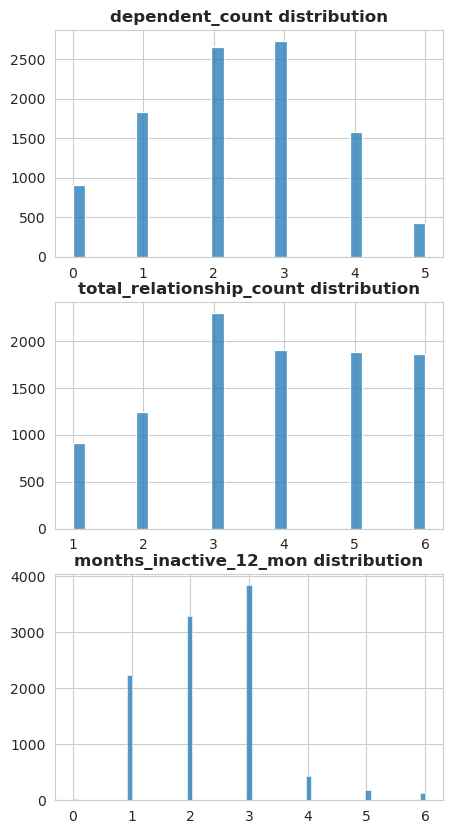

In [4]:
numeric_columns_2=['dependent_count', 'total_relationship_count', 'months_inactive_12_mon']

plt.figure(figsize=(5,10))

for i, col in enumerate(numeric_columns_2):
    plt.subplot(3,1,i+1)
    sns.histplot(data=customer, x=col)
    plt.title(f'{col} distribution', weight='bold')
    plt.ylabel('')
    plt.xlabel('')
   
plt.show()

Above are the distributions of discrete numerical variables in the dataset. 

* Distribution of dependent count is fairly symmetrical beaking at a count of three.
* Total_relationship_count is left skewed and peaks at three.  
* Months_inactive_12_mon distribution is right skewed and peaks at three.

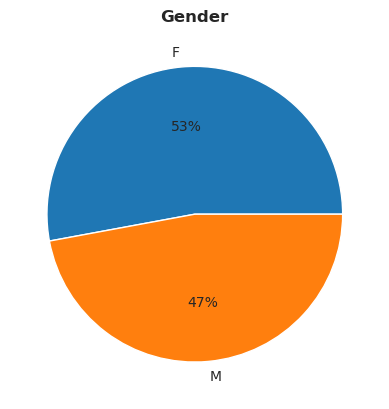

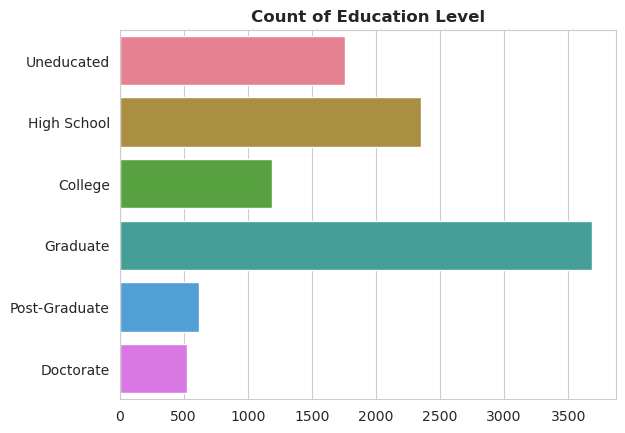

Text(0, 0.5, '')

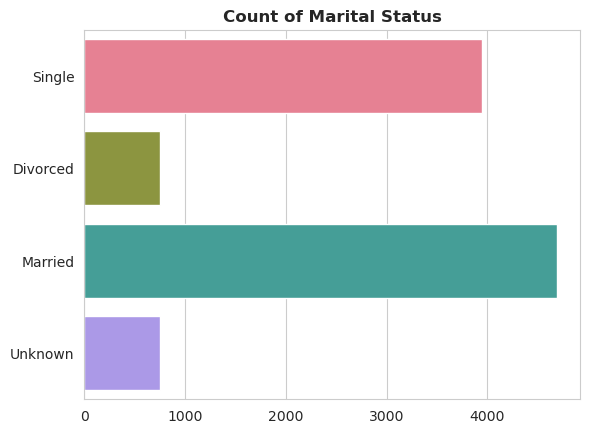

In [5]:
order=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']

customer['gender'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.title('Gender', weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

sns.countplot(data=customer, y='education_level', order=order, orient='h',palette=sns.color_palette("husl", 6))
plt.title('Count of Education Level', weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()


order=['Single', 'Divorced', 'Married', 'Unknown']
sns.countplot(data=customer, y='marital_status', order=order,orient='h',palette=sns.color_palette("husl", 4))
plt.title('Count of Marital Status', weight='bold')
plt.xlabel('')
plt.ylabel('')


Above is the catagorical data in the dataset.

* Gender of customers in the dataset are roughly equal with females outnumbering males.
* Education level of customers typically peaks at college graduation.  Fairly few have higher degrees.
* Single and Married are the two largest count in customer's marital status.

## Feature Engineering

Need to convert catagorical data in the dataset into an useable form for the data model.  First will convert the values of the gender column to 1 for male and 0 for female.  Then will convert the education_level column to values between 0 to 5.

In [6]:
customers_modif=customer.copy()
# replace 'M' in gender column with 1 and 'F' with 0
customers_modif['gender']=customers_modif['gender'].apply(lambda x: 1 if x=='M' else 0)

education_map={'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3,
              'Post-Graduate':4, 'Doctorate':5}

customers_modif['education_level']=customers_modif['education_level'].map(education_map)

customers_modif[['gender', 'education_level']].head(10)

,gender,education_level
0,1,1
1,0,3
2,1,3
3,0,1
4,1,0
5,1,3
6,1,1
7,1,1
8,1,0
9,1,3


Unlike the other two catagorical catagories, there is no order of magnitude between different statuses in marital_status.  Converting these values using one-hot_encoding to dummy variables will make the data useable in the data model without conveying any magnitude.

In [7]:
marital_dummies=pd.get_dummies(customers_modif['marital_status'], drop_first=False)
customers_modif=pd.concat([customers_modif, marital_dummies], axis=1)

customers_modif=customers_modif.drop(columns='marital_status')
customers_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
 13  Divorced                  10127 non-null  uint8  
 14  Marrie

In [8]:
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Divorced,Married,Single,Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0


Customer_id is nominal data and would be useless for the data model and is unable to be used for any correlations.  This column will be removed.

Now that all the features of the dataset have been converted to numerical values it is now possible to create a correlation heatmap to find which variables corrolate the strongest with each other.  

Text(0.5, 1.0, "Pearson's correlation heatmap")

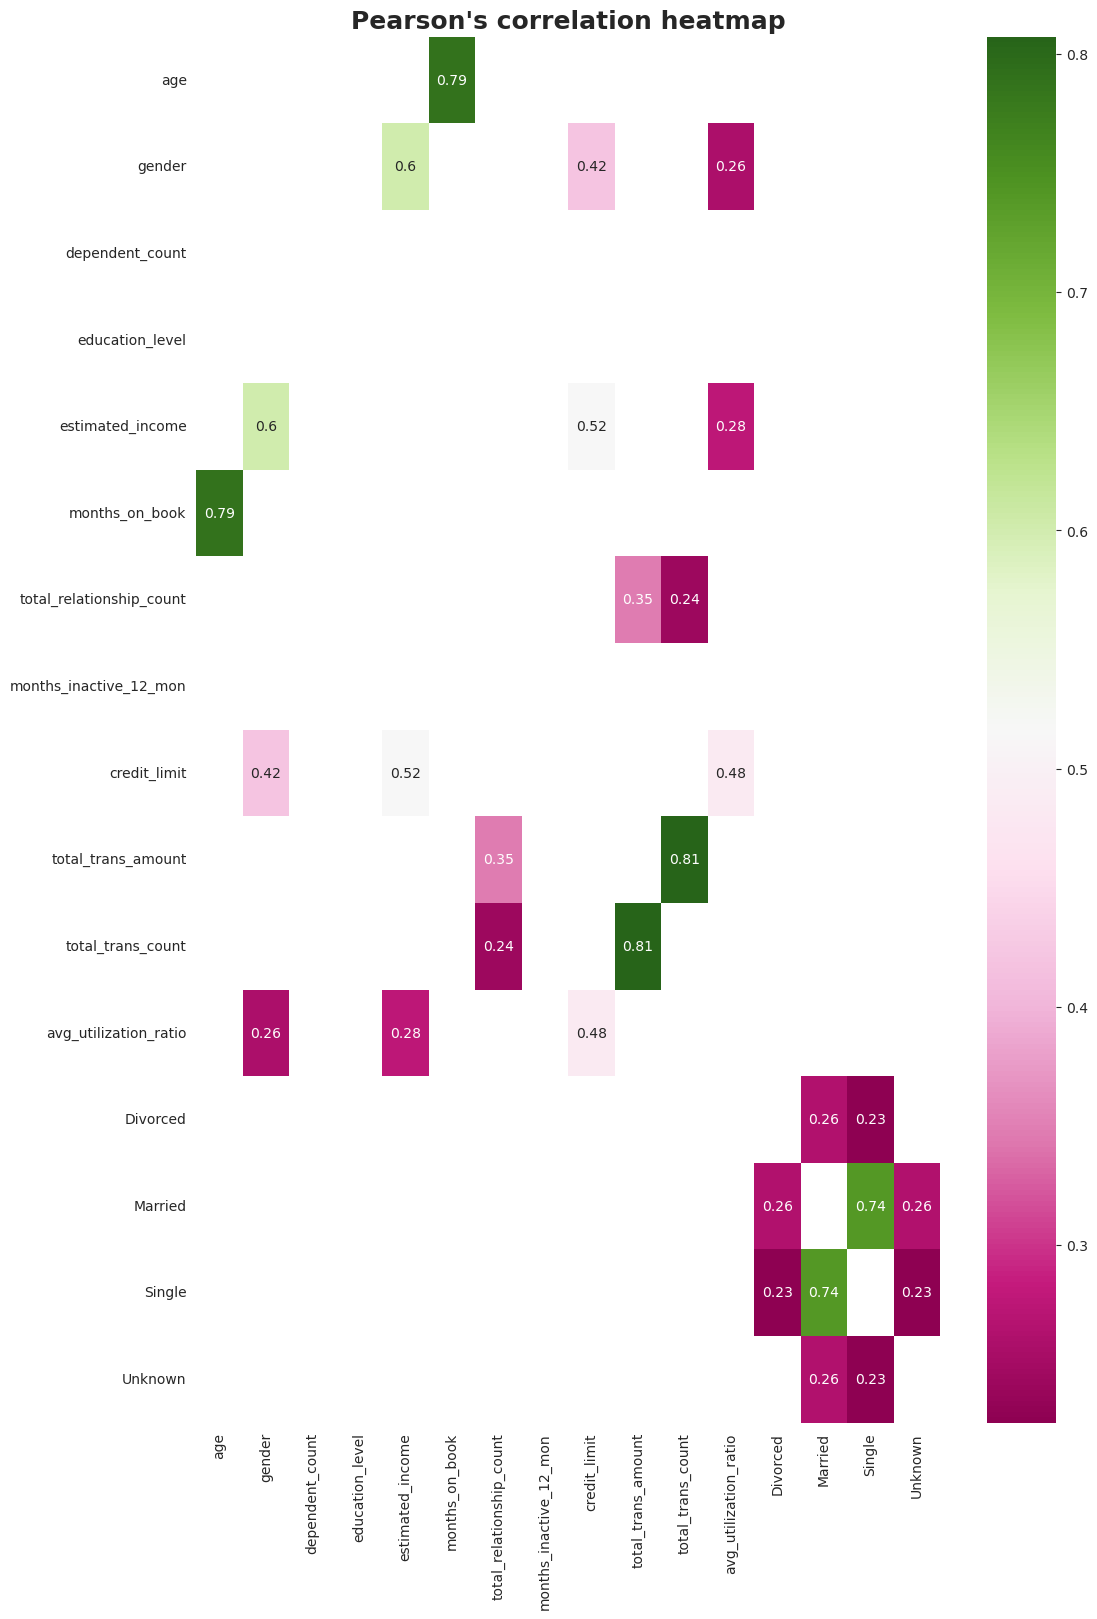

In [9]:
customers_modif=customers_modif.drop(columns='customer_id')
correlations=abs(customers_modif.corr())

# Create heatmap with only high correlation values to avoid overcrowding
# and increase readability.

plt.figure(figsize=(12,18))
sns.heatmap(correlations[(correlations>0.20)&(correlations<1)], cmap="PiYG", annot=True)
plt.title("Pearson's correlation heatmap", weight='bold', size=18)

The following pairs were highly corrolated:

* age to months_on_book
* total_trans_amount to total_trans_count
* estimated_income to credit_limit
* avg_utilization_ratio to credit_limit

## Scaling the Data

Now that the data is in a numerical format.  The data needs to be scaled so all the datapoints are in a similar magnitude.  Without doing so would make the results unweildy and difficult to interpret.  Comparing datapoints that range from 0 to 1 would be difficult to compare to datapoints that scale from 5,000 to 35,000.  A standard scaler that scales the data by standard deviation will be used due being useful for features that follow a *normal* distribution.

In [10]:
scaler=StandardScaler()
scaler.fit(customers_modif)
scaled_customers=scaler.transform(customers_modif)

scaled_customers

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

In [11]:
scaled_customers=pd.DataFrame(scaled_customers)
print(scaled_customers)

             0         1         2         3         4         5         6   \
0     -0.165406  1.059956  0.503368 -0.752211  0.175810  0.384621  0.763943   
1      0.333570 -0.943436  2.043199  0.662787 -0.967166  1.010715  1.407306   
2      0.583058  1.059956  0.503368  0.662787  0.785397  0.008965  0.120579   
3     -0.789126 -0.943436  1.273283 -0.752211 -0.636973 -0.241473 -0.522785   
4     -0.789126  1.059956  0.503368 -1.459710  0.074212 -1.869317  0.763943   
...         ...       ...       ...       ...       ...       ...       ...   
10122  0.458314  1.059956 -0.266547  0.662787 -0.281380  0.509840 -0.522785   
10123 -0.664382  1.059956 -0.266547  0.662787 -0.560775 -1.368442  0.120579   
10124 -0.290150 -0.943436 -1.036462 -0.752211 -0.738571  0.008965  0.763943   
10125 -2.036565  1.059956 -0.266547  0.662787 -0.382978  0.008965  0.120579   
10126 -0.414894 -0.943436 -0.266547  0.662787 -0.662372 -1.368442  1.407306   

             7         8         9         10      

## Choosing K

Now that the data has been scaled.  It is now time to determine the optimal number of clusters to segment the customers using the elbow rule.  To do so a loop will be created showing the in overall inertia compared to the number of clusters.  The number of clusters will be chosen based when the change in inertia beween points starts to drastically slow down as it indicates the point of diminishing returns.

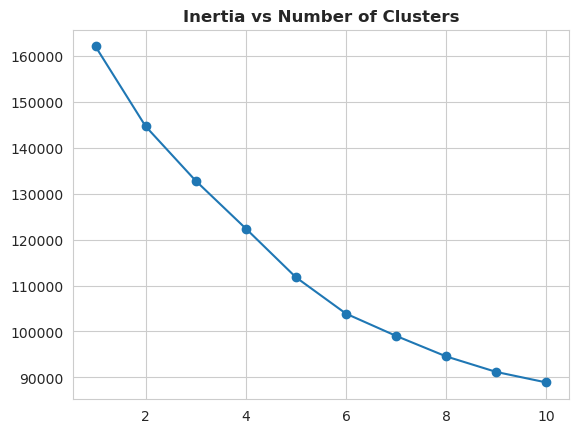

In [12]:
inertias=[]

for i in range(10):
    model=KMeans(n_clusters=i+1, random_state=50)
    clusters=model.fit_predict(scaled_customers)
    inertias.append(model.inertia_)
    
plt.plot(range(1,11),inertias, marker='o')
plt.title('Inertia vs Number of Clusters', weight='bold')
plt.show()

In [13]:
percentages=[]

for i in range(1,11):
    model1=KMeans(n_clusters=i,n_init=10, random_state=50)
    model2=KMeans(n_clusters=i+1,n_init=10, random_state=50)
    clusters1=model1.fit_predict(scaled_customers)
    clusters2=model2.fit_predict(scaled_customers)
    inertia1 = model1.inertia_
    inertia2 = model2.inertia_
    percentage = (inertia1-inertia2)/inertia1*100
    percentages.append(percentage)

Text(0.5, 0, 'Number of Clusters')

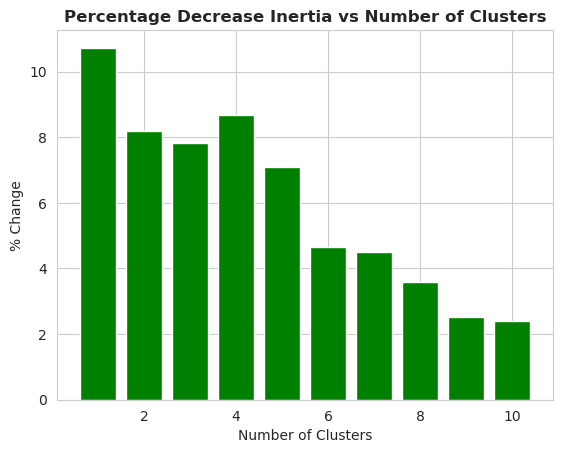

In [14]:
plt.bar(range(1,11), percentages, color='green')
plt.title('Percentage Decrease Inertia vs Number of Clusters', weight='bold')
plt.ylabel('% Change')
plt.xlabel('Number of Clusters')


Cluster sizes between five to seven look most appropriate. Five clusters was be chosen to make the final results easier to understand.

In [15]:
model=KMeans(n_clusters=5, n_init=10, random_state=50)
clusters=model.fit_predict(scaled_customers)

Now that the clusters for each row have been generated.  The clusters will be added back to the original dataset under a column named *CLUSTER*.  Afterwards the data set will be graphed by groups of clusters.

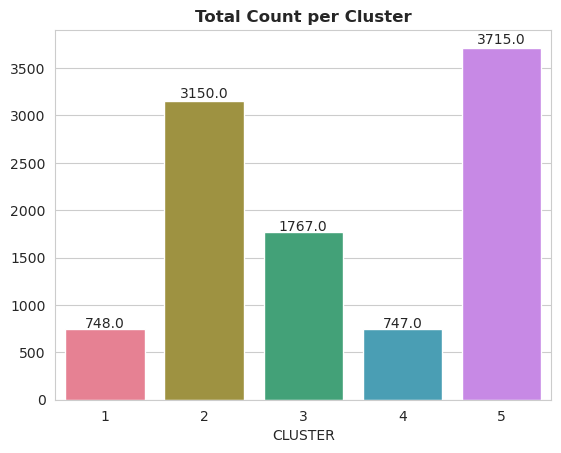

In [16]:
customer['CLUSTER']=clusters+1

p=sns.countplot(data=customer, x='CLUSTER',palette=sns.color_palette("husl", 5))
plt.title('Total Count per Cluster', weight='bold')
plt.ylabel('')
show_values(p)
plt.show()


Clusters 2 and 5 are the most populated with cluster one being the least populated.

## Analyzing the Results

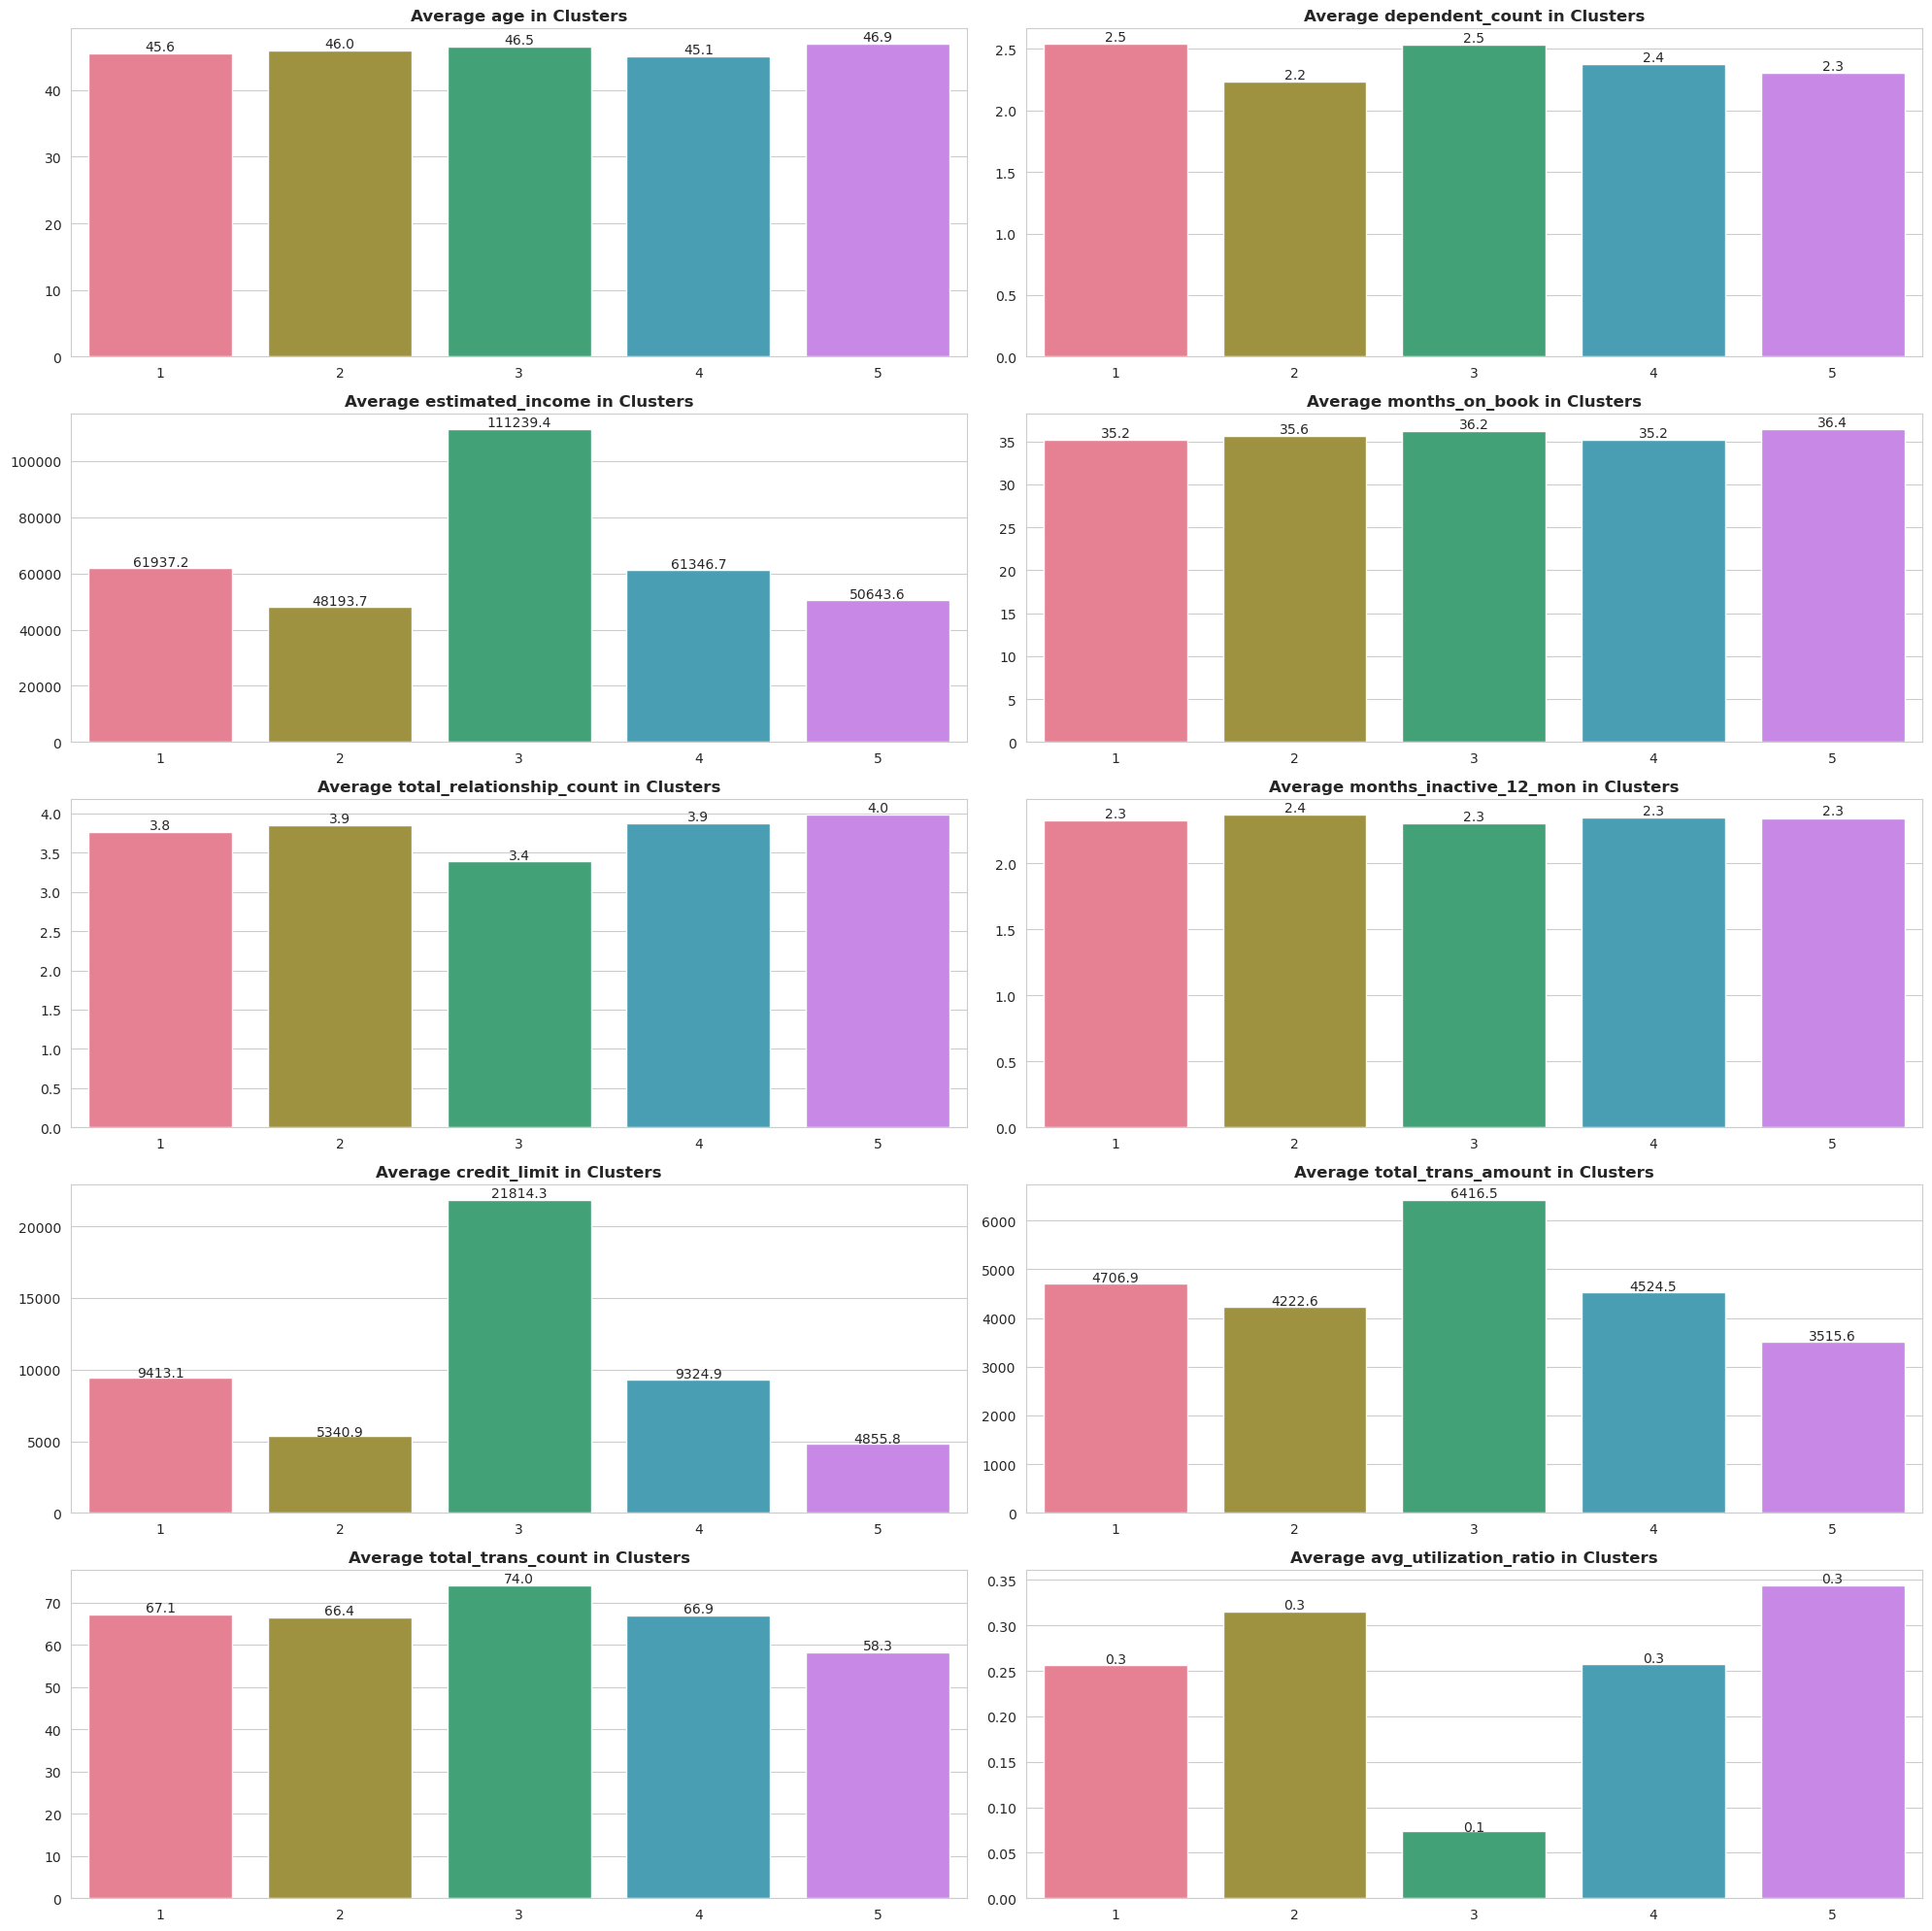

In [17]:
numeric_columns = customer.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

plt.figure(figsize=(20,20))

for i, col in enumerate(numeric_columns):
    plt.subplot(5,2,i+1)
    p=sns.barplot(data=customer, x='CLUSTER', y=col,palette=sns.color_palette("husl", 5), ci=None)
    plt.title(f'Average {col} in Clusters', weight='bold')
    plt.ylabel('')
    plt.xlabel('')
    show_values(p)
plt.tight_layout()   
plt.show()

### Notable Characteristics of numerical features of the Clusters

The following features are fairly uniform across all clusters:

* Age
* Dependent_count
* Months_on_Books
* Months_inactive_12_mon
* Total_relationship_count

Overview of Cluster Results:

**Cluster 1**
* Estimated_income is \\$62,000
* Credit_limit is \\$9,400
* Total_trans_amount is \\$4,700
* Totals_trans_count of 67
* Utilization_ratio of 0.25

**Cluster 2**
* Estimated_income is \\$48,000
* Credit_limit is \\$5,300
* Total_trans_amount is \\$4,200
* Totals_trans_count of 66
* Utilization_ratio of 0.32

**Cluster 3**
* Estimated_income is \\$111,000
* Credit_limit is \\$22,000
* Total_trans_amount is \\$6,400
* Totals_trans_count of 74
* Utilization_ratio of 0.08

**Cluster 4**

* Estimated_income is \\$61,000
* Credit_limit is \\$9,300
* Total_trans_amount is \\$4,500
* Totals_trans_count of 67
* Utilization_ratio of 0.26

**Cluster 5**

* Estimated_income is \\$50,000
* Credit_limit is \\$4,900
* Total_trans_amount is \\$3,500
* Totals_trans_count of 58
* Utilization_ratio of 0.34

Overall Clusters 1 and 4 are very similar.  Clusters 2 and 5 are also fairly comparable although Cluster 2 tends to spend more than Cluster 5 despite having overall lower income. 
Cluster 3 is by far the wealthiest and have the lowest utilization ratio.

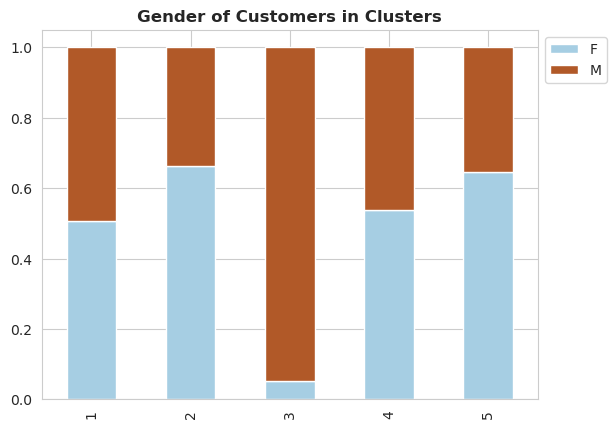

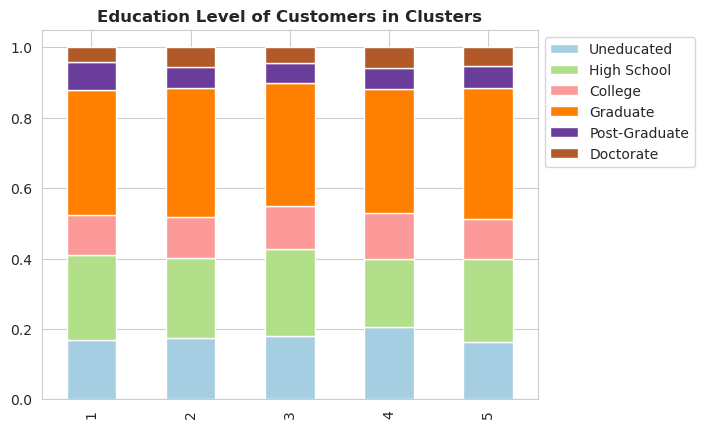

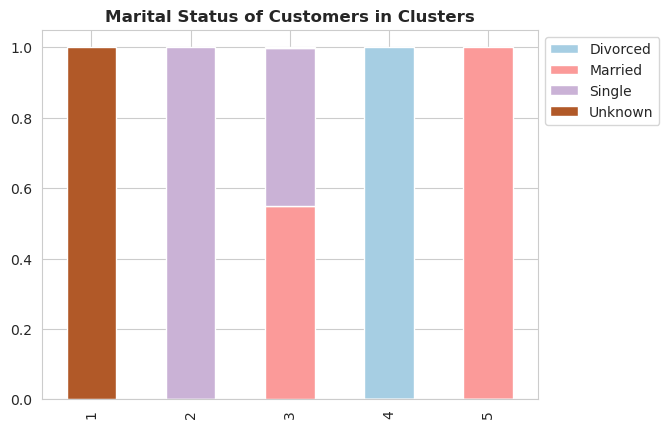

In [18]:
plot_gender = pd.crosstab(
  index=customer['CLUSTER'], columns=customer['gender'],
  values=customer['gender'], aggfunc='size', normalize='index')

plot_education = pd.crosstab(
  index=customer['CLUSTER'], columns=customer['education_level'],
  values=customer['education_level'], aggfunc='size', normalize='index')

order=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
plot_education = plot_education.reindex(columns=order)

plot_marital = pd.crosstab(
  index=customer['CLUSTER'], columns=customer['marital_status'],
  values=customer['marital_status'], aggfunc='size', normalize='index')

names=['Gender of Customers in Clusters', 'Education Level of Customers in Clusters', 'Marital Status of Customers in Clusters']

for name, duck in zip(names,[plot_gender, plot_education, plot_marital]):
    duck.plot.bar(stacked=True,colormap='Paired')
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title(name, weight='bold')
    plt.xlabel('')
    plt.show()    

### Notable characteristics of catagorical features of the Clusters

Education levels are fairly uniform across all clusters.

**Cluster 1**
* Gender mix is 50/50 males to females
* Marital Status is all Unknown

**Cluster 2**
* Gender mix favors females
* Marital Status is Single

**Cluster 3**

* Gender mix strongly favors males
* Marital Status is mix of single and married

**Cluster 4**

* Gender mix is about 50/50 males to females
* Marital Status is Divorced

**Cluster 5**

* Gender mix favors females
* Marital Status is married

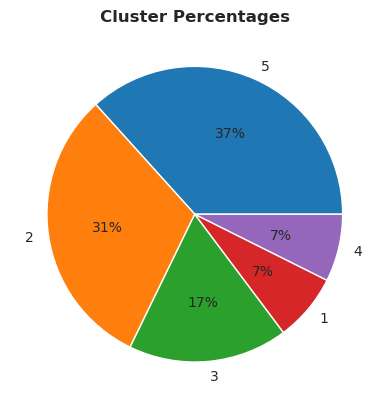

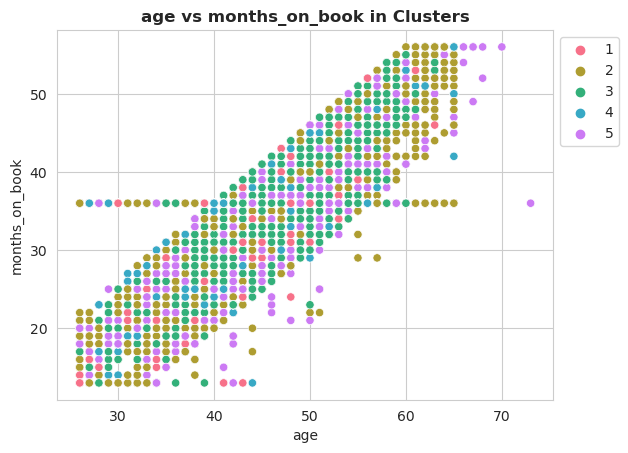

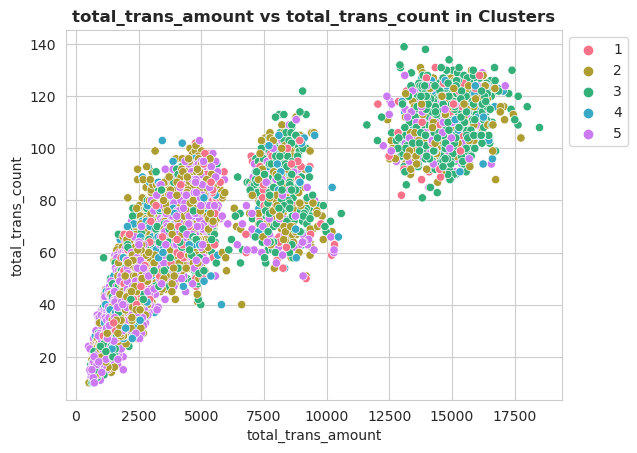

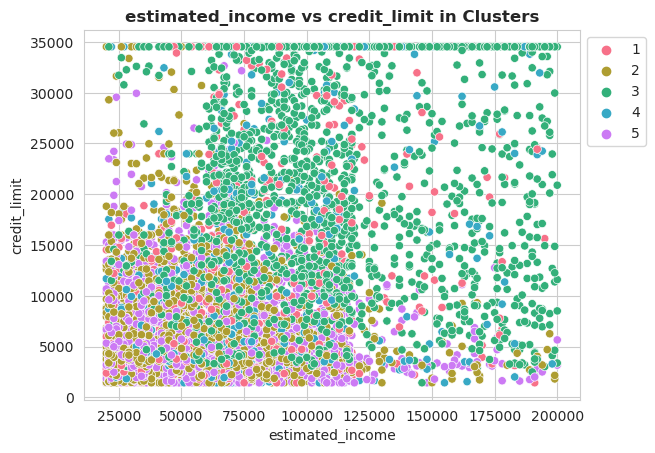

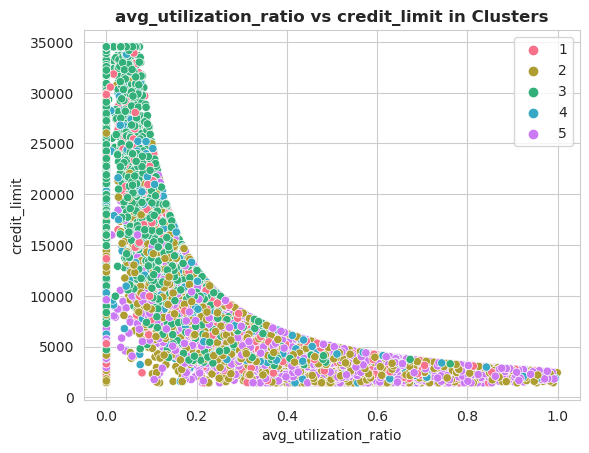

In [19]:
customer['CLUSTER'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.title('Cluster Percentages', weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

top_corrs=[['age', 'months_on_book'], ['total_trans_amount', 'total_trans_count'], ['estimated_income', 'credit_limit'],['avg_utilization_ratio','credit_limit']]

for col in top_corrs:
    sns.scatterplot(data=customer, hue='CLUSTER', x=col[0], y=col[1],palette=sns.color_palette("husl", 5))
    plt.title(col[0]+' vs '+col[1]+' in Clusters', weight='bold')
    plt.ylabel(col[1])
    plt.xlabel(col[0])
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()

Features that are compared together was determined by the correlation chart.

### Notable characteristics of notable comparisons of the Clusters

Education levels are fairly uniform across all clusters.

**Cluster 1**
* Contains 7% of Dataset
* Medium income

**Cluster 2**
* Contains 31% of Dataset
* Low overall income
* Tends to have high amount of credit utilization and small credit limit.

**Cluster 3**

* Contains 17% of Dataset
* Medium to high income
* Tends to have low amount of credit utilization and large credit limit.
* Typically high amount of transactions

**Cluster 4**

* Contains 7% of Dataset
* Medium income
* Typically younger customers in this Cluster

**Cluster 5**

* Contains 37% of Dataset
* Low overall income
* Tends to have high amount of credit utilization and small credit limit.

## Cluster Consolidation

After analysis, it may be preferable to reduce 5 Clusters into 3 Clusters due to many of the clusters being so similar to each other.

Cluster 1 and 4 will be merged into a new cluster as will Cluster 2 and 5.  Cluster 3 will stay the same.  Afterwards, business recommendations will be made based on these new clusters.

* New Cluster 1 will contain Clusters 1 and 4
* New Cluster 2 will contain Clusters 2 and 5
* New Cluster 3 will contain Cluster 3

In [22]:
new_customer=customer.copy()            
new_customer.loc[new_customer["CLUSTER"] == 4, "CLUSTER"] = 1 
new_customer.loc[new_customer["CLUSTER"] == 5, "CLUSTER"] = 2    

2    6865
3    1767
1    1495
Name: CLUSTER, dtype: int64

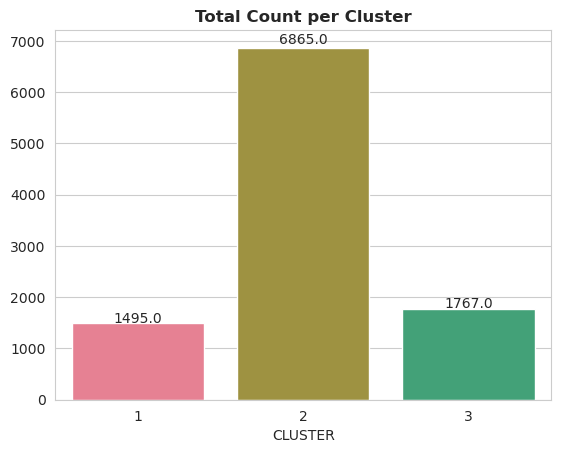

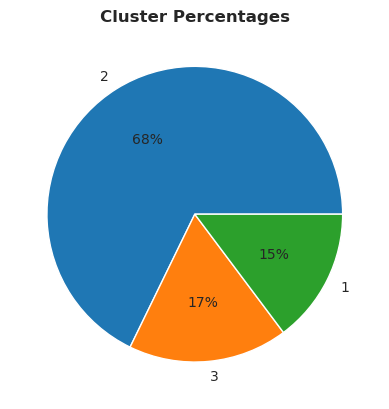

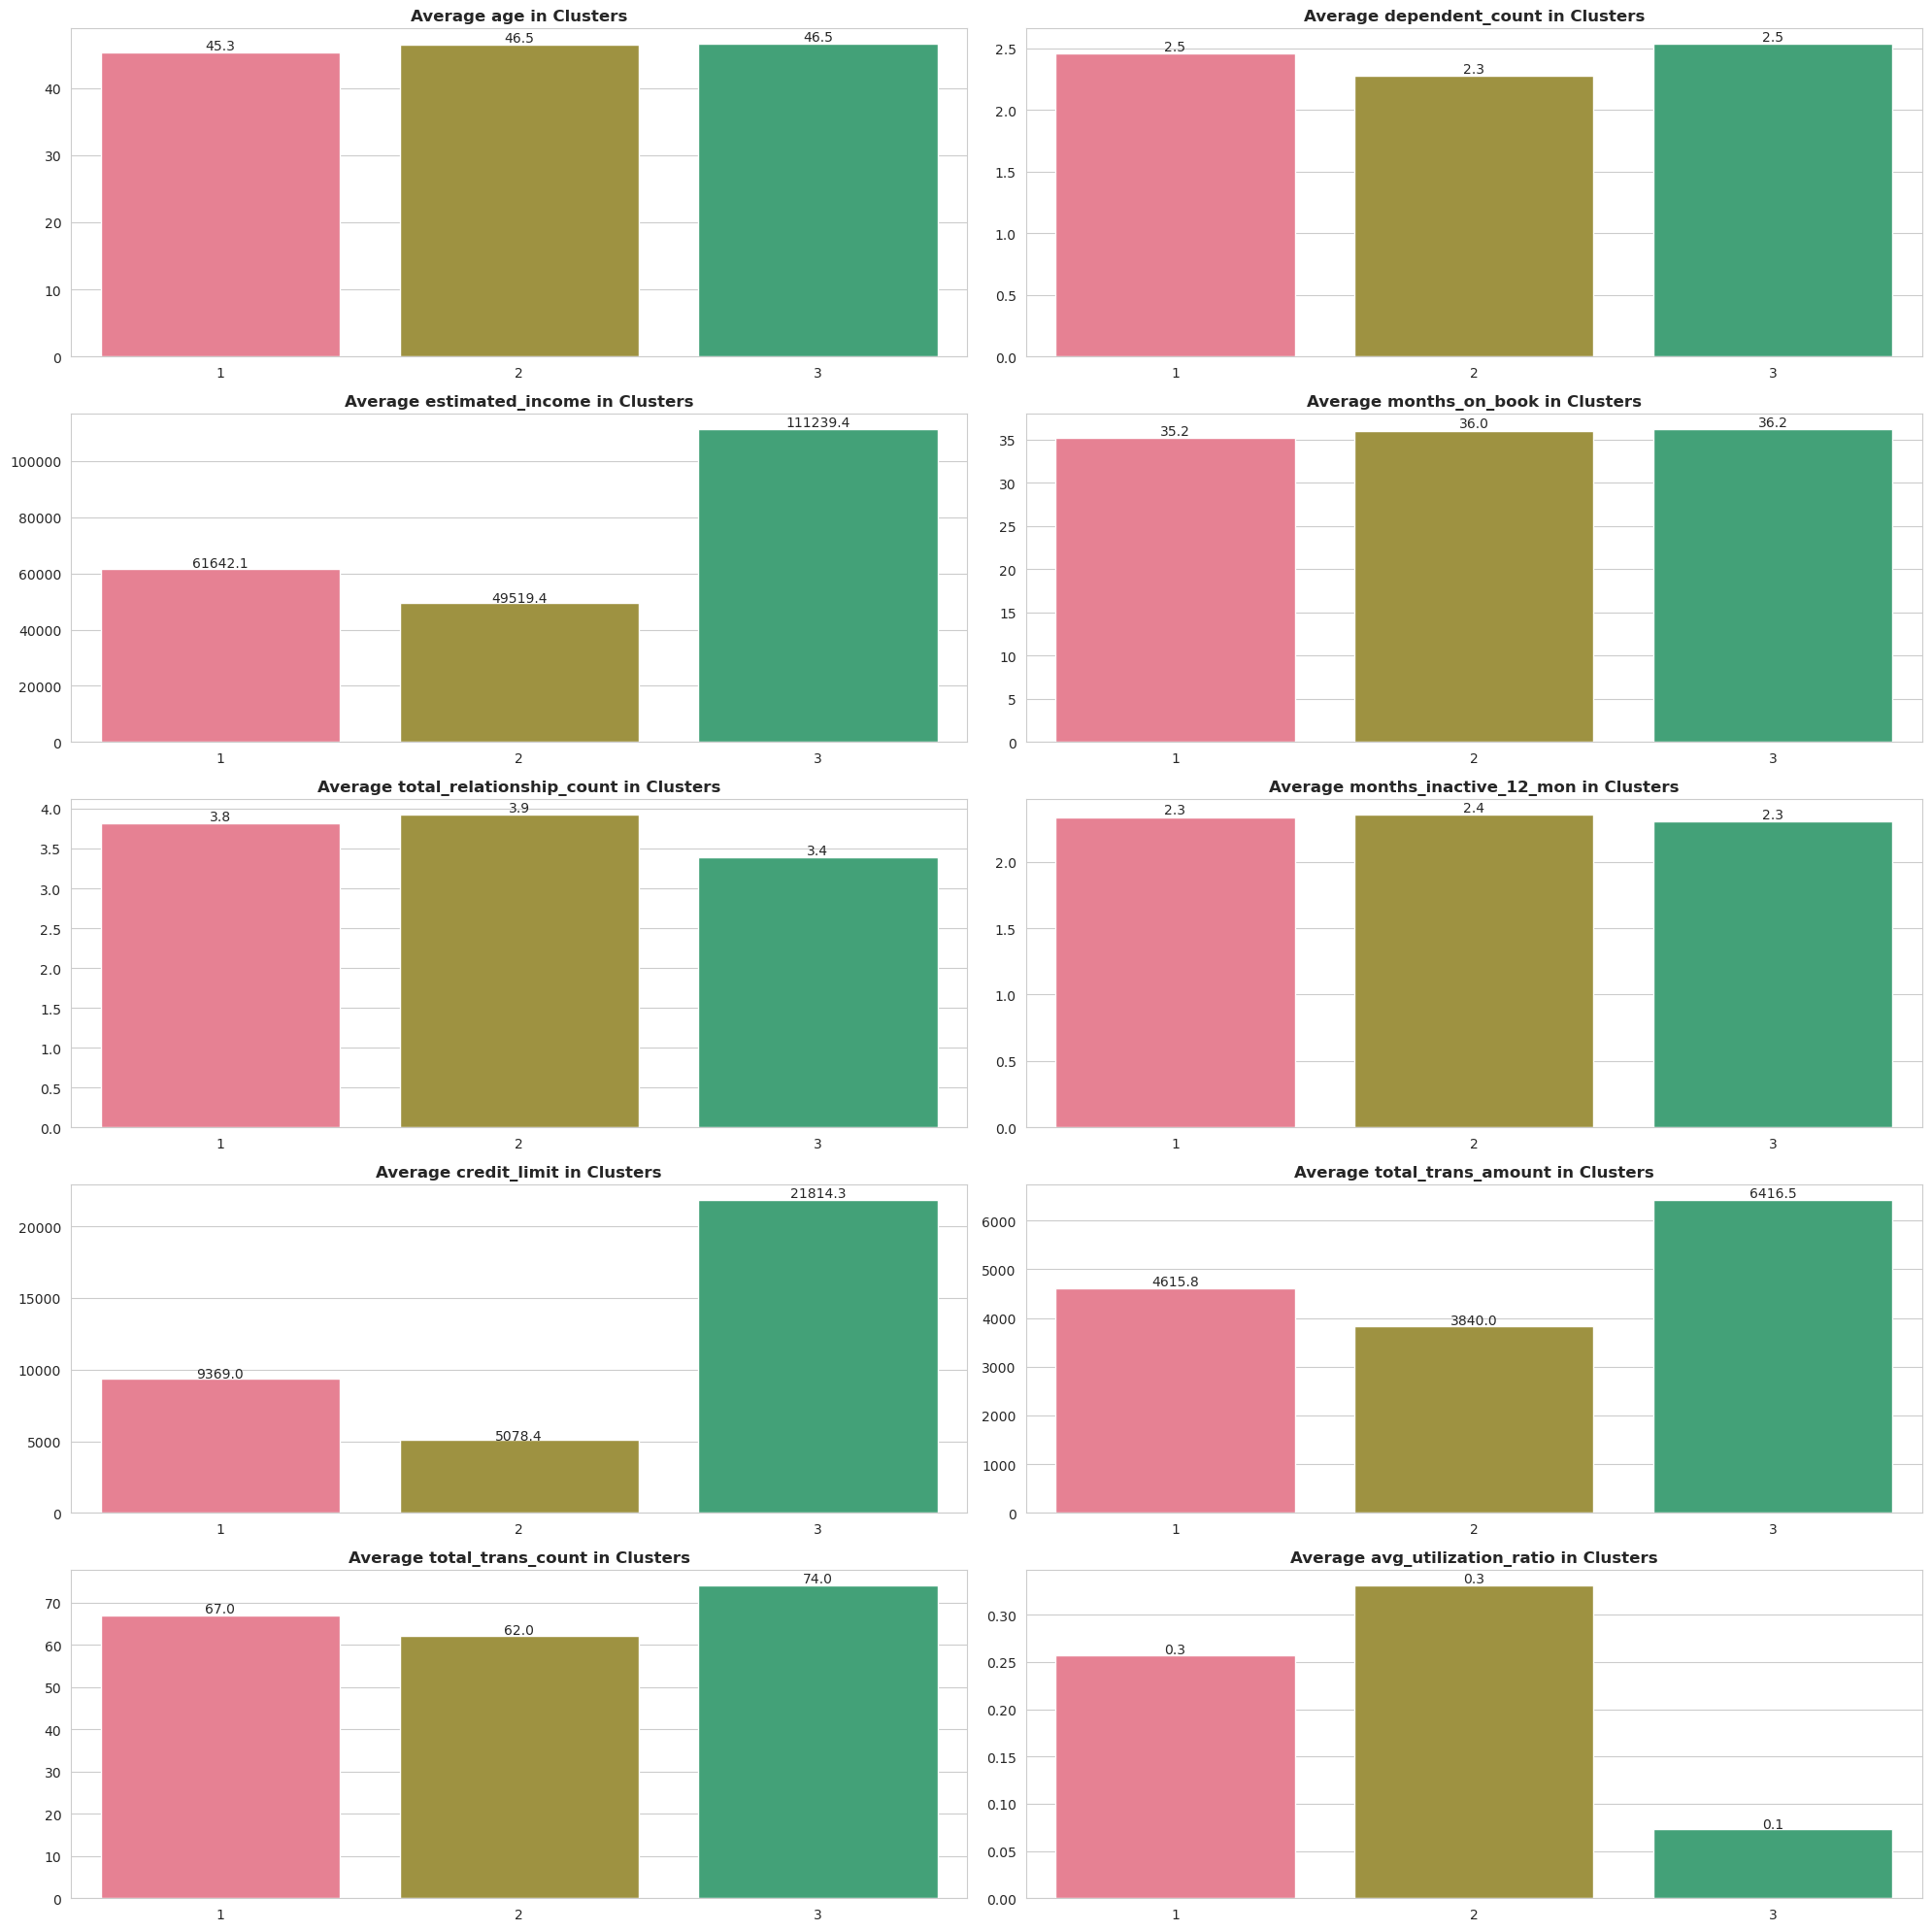

In [23]:
p=sns.countplot(data=new_customer, x='CLUSTER',palette=sns.color_palette("husl", 5))
plt.title('Total Count per Cluster', weight='bold')
plt.ylabel('')
show_values(p)
plt.show()

new_customer['CLUSTER'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.title('Cluster Percentages', weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

plt.figure(figsize=(20,20))

for i, col in enumerate(numeric_columns):
    plt.subplot(5,2,i+1)
    p=sns.barplot(data=new_customer, x='CLUSTER', y=col,palette=sns.color_palette("husl", 5), ci=None)
    plt.title(f'Average {col} in Clusters', weight='bold')
    plt.ylabel('')
    plt.xlabel('')
    show_values(p)
plt.tight_layout()   
plt.show()

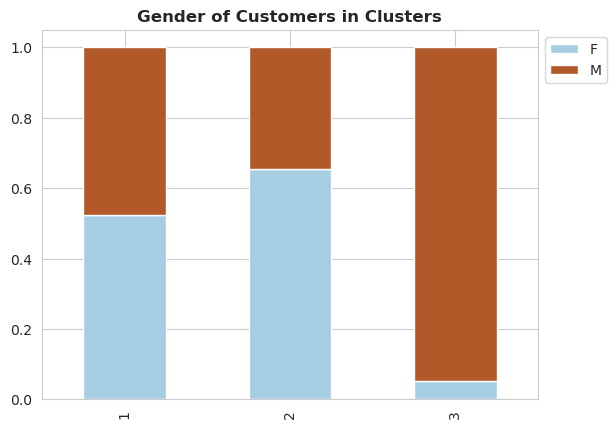

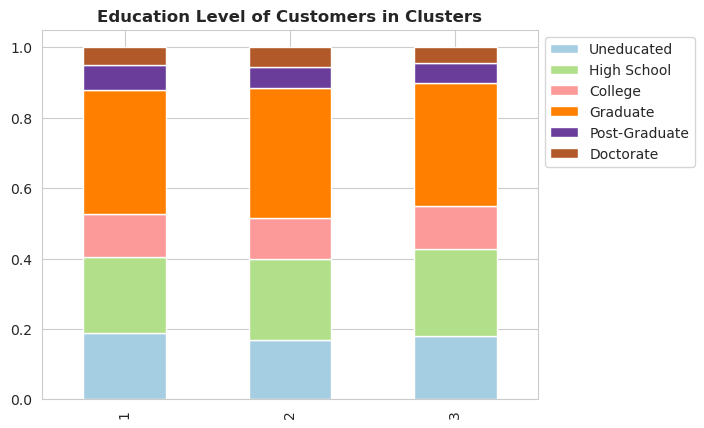

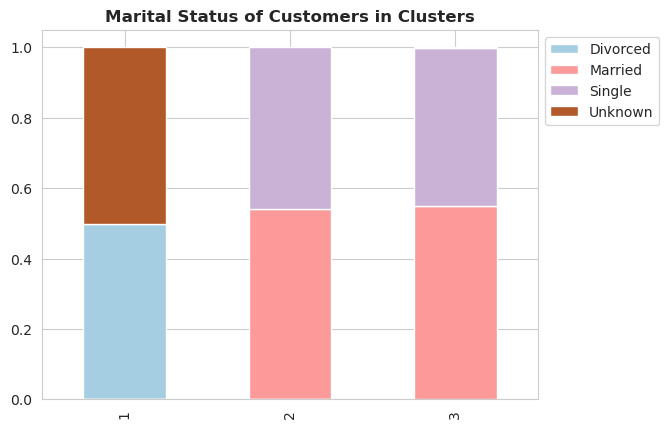

In [24]:
plot_gender = pd.crosstab(
  index=new_customer['CLUSTER'], columns=new_customer['gender'],
  values=new_customer['gender'], aggfunc='size', normalize='index')

plot_education = pd.crosstab(
  index=new_customer['CLUSTER'], columns=new_customer['education_level'],
  values=new_customer['education_level'], aggfunc='size', normalize='index')

order=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
plot_education = plot_education.reindex(columns=order)

plot_marital = pd.crosstab(
  index=new_customer['CLUSTER'], columns=new_customer['marital_status'],
  values=new_customer['marital_status'], aggfunc='size', normalize='index')

names=['Gender of Customers in Clusters', 'Education Level of Customers in Clusters', 'Marital Status of Customers in Clusters']

for name, duck in zip(names,[plot_gender, plot_education, plot_marital]):
    duck.plot.bar(stacked=True,colormap='Paired')
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title(name, weight='bold')
    plt.xlabel('')
    plt.show()   

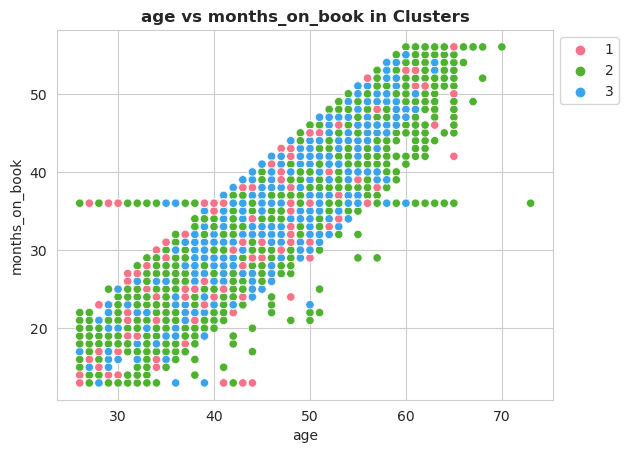

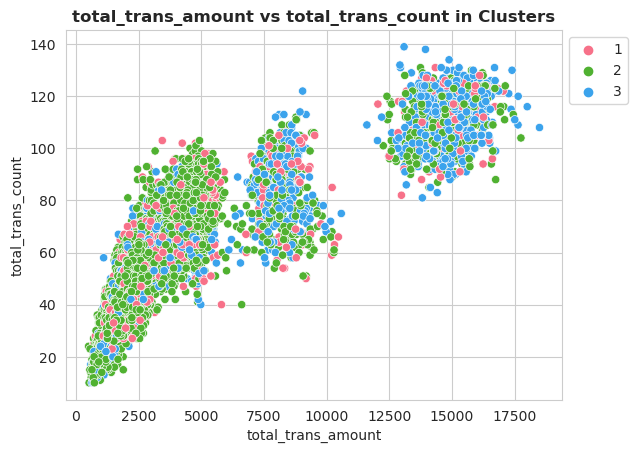

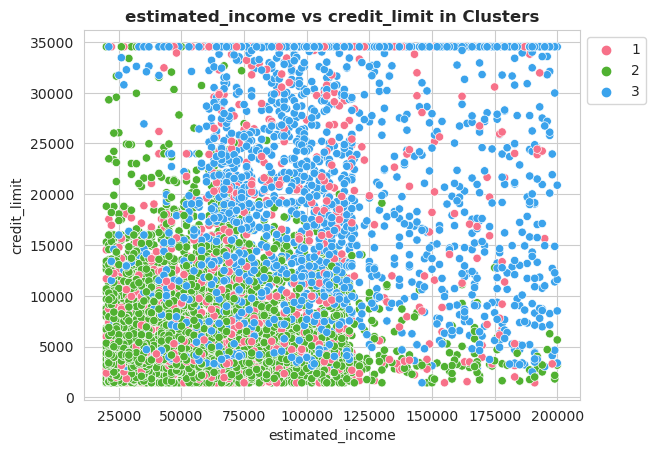

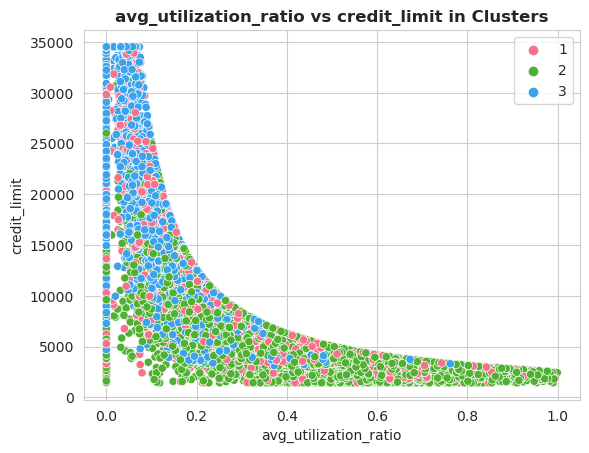

In [26]:
for col in top_corrs:
    sns.scatterplot(data=new_customer, hue='CLUSTER', x=col[0], y=col[1],palette=sns.color_palette("husl", 3))
    plt.title(col[0]+' vs '+col[1]+' in Clusters', weight='bold')
    plt.ylabel(col[1])
    plt.xlabel(col[0])
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()

**Cluster 1**

* Contains 15% of Dataset
* Medium income
* Tends to have the highest overall variability 
* About 50/50 males to females
* Cluster with highest divorced marital status

**Cluster 2**

* Contains 68% of Dataset
* Low overall income
* Tends to have high amount of credit utilization and small credit limit.
* Tends to be either young or near/past retirement age

**Cluster 3**

* Contains 16% of Dataset
* Medium to high income
* Tends to have low amount of credit utilization and large credit limit.
* Typically high amount of transactions
* Tends to be middle aged and mostly males

## Business Recommendations

Cluster 1 is middle income, but overall has a very high variablility when it comes to finances.  Because of this it is very difficult to make any recommendations without more datapoints.  This Cluster should be considered a wildcard at this point.

Cluster 2 is overall low income with high credit utilization.  Many of customers in this Cluster are likely at the very beginning of their careers or are near or past retirement.  While increasing fees might increase short term profitability there is a danger of losing these customers if pressed too hard.  It would not be prudent to lose the loyalty of this segment as many of them will enter their prime earning stage in their careers within the next few years.  Increase monthly transaction counts through incentives to maximize revenue from fees from these individual transactions.

Cluster 3 is by far the highest earning cluster with the lowest credit utilization.  Individuals in this clusters tend to be middle-aged males likely in the peak of their career.  As such, this cluster has the most disposable income.  The low utilization likely means that a good amount of this segment pay off their credit cards from month to month.  Finding ways to increase utilzation through rewards and incentives might be prudent.  It might also be useful to do market research on increasing the amount of time transactions stay on cards before being paid off to increase revenue from interest rates.